# KNN algorithm Implementation in Python - Exercise

## Overview  
The k-Nearest Neighbors Algorithm is one of the most fundamental and powerful algorithms to understand, implemented and used in classification problems when there is no or little knowledge about the distribution of the data.

In this exercise, testing with a different numbers neighbors (k) will be done for comparison purposes.  
We have 4th dimensional data and their assigned class. There is 3 classes in total.

The Scikit-learn machine learning library for Python will be used to quickly calculate the accuracy of our results. 


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.io as sio
import math
import operator
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [2]:
#Loading data from a MATLAB file and splitting it into training and testing sets. 
data = sio.loadmat('ex3.data.mat')
X = data['X']
Y = data['Y']
X_train, X_test, Y_train, Y_test = train_test_split(data['X'], data['Y'], test_size=0.5,random_state=0)


In [3]:
class KNN(object):
    def __init__(self, k: int, X_train: np.ndarray, Y_train: np.ndarray) -> None:
        self.k=k
        self.train_data=np.append(X_train,Y_train,axis=1)
        return

    def classify(self, X_test: np.ndarray) -> np.ndarray:
        pred = []
        for i in range(len(X_test)):
            voisins = self.getVoisins(X_test[i])
            pred.append(self.getPredictions(voisins))
        return np.array(pred)
    
    def distance_euclidienne(self,point1, point2, dimension) -> np.ndarray:
        distance = np.array(0.0)
        for i in range(dimension):
            distance += pow(point1[i] - point2[i], 2)
        return math.sqrt(distance)

    def getVoisins(self,point_test):
        distances = []
        voisins = []
        dimension = len(point_test)
        for i in range(len(self.train_data)):
            dist = self.distance_euclidienne(point_test, self.train_data[i], dimension)
            distances.append((self.train_data[i],dist))        
        distances.sort(key=operator.itemgetter(1))
        for i in range(self.k):
            voisins.append(distances[i][0])
        return voisins

    def getPredictions(self,voisins):
        vote_etiquettes = {}
        for i in range(len(voisins)):
            reponse = voisins[i][-1]
            if reponse in vote_etiquettes:
                vote_etiquettes[reponse] += 1
            else:
                vote_etiquettes[reponse] = 1
        prediction = sorted(vote_etiquettes.items(), key=operator.itemgetter(1), reverse=True)
        return prediction[0][0]


<function matplotlib.pyplot.show(close=None, block=None)>

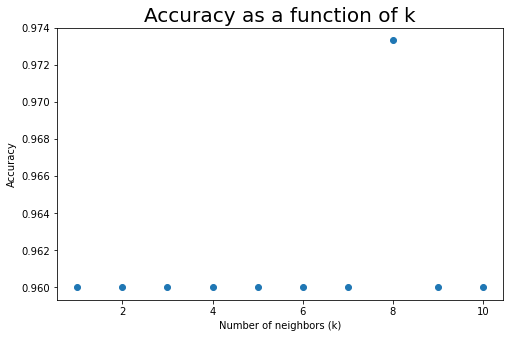

In [4]:
# To compare the results, the algorithm will be looped with different values of k each time.
k = np.arange(1,11)
Accuracy1=[]
for i in k:
    model = KNN(i,X_train,Y_train)
    predictions = model.classify(X_test)
    acc=accuracy_score(Y_test,predictions)
    Accuracy1.append(acc)

plt.figure(20, figsize=(8, 5))
plt.clf
plt.scatter(k,Accuracy1)
plt.title("Accuracy as a function of k",fontsize=20)
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Accuracy")
plt.show


# Results:

From the testing done with our training data, using 8 neighbors for the classification gives us the best classification accuracy at 97.4%.